In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime
import glob
import pickle
from datetime import datetime, timedelta
import sys
from scipy.optimize import curve_fit

#import the folder that has the analysis level class
sys.path.append("../CombinedData/")
sys.path.append("../AnalysisTools/")
import Dataset
import AnalysisTools


In [2]:
#common = "/p/lustre2/nexouser/data/StanfordData/angelico/hv-test-chamber/"
common = "../../data/" 
topdirs = {5:"{}Run5/".format(common), 6:"{}Run6/".format(common), 7:"{}Run7/".format(common), 8:"{}Run8/".format(common), 9:"{}Run9/".format(common)}
configs = {5:"../configs/run5_config.yaml", 6:"../configs/run6_config.yaml", 7:"../configs/run7_config.yaml", 8:"../configs/run8_config.yaml", 9:"../configs/run9_config.yaml"}
titles = {5:"SS uncoated", 6:"Refill of SS uncoated", 7:"Al-MgF2 (50nm)", 8:"Al-Pt (50nm)", 9:"Al-MgF2 (20nm)"}
red_file_name = "combined_reduced.p"
#analysis tools objects, unloaded data
anas = {}
for n in topdirs:
    anas[n] = AnalysisTools.AnalysisTools(topdirs[n]+red_file_name, configs[n], title=titles[n], ramp_topdir=topdirs[n])


/Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/ad2-data-processing/notebooks/../AnalysisTools/AnalysisTools.py:127: UserWarning: genfromtxt: Empty input file: "../../data/Run8/ds03/g_events.txt"
  d = np.genfromtxt(os.path.join(root, self.config["g_events_name"]), delimiter=',', dtype=float)


In [3]:
#load data into mem if you want
for n, ana in anas.items():
    ana.load_dataframe()

In [15]:
ana = anas[9]
all_light = ana.get_light_triggers()
print("Total light triggers: {:d}".format(len(all_light.index)))
tsep = 10 #seconds from any charge signals
cosmic_light = ana.get_cosmic_triggers(tsep, N=1000)
print("Total cosmic triggers: {:d}".format(len(cosmic_light.index)))

Total light triggers: 199463
0
0
0
0
1
2
2
3
4
4
5
5
6
6
7
8
8
8
8
8
9
10
11
12
13
13
14
14
14
14
14
15
16
16
17
17
17
18
19
20
20
20
21
22
22
23
24
24
24
24
24
25
26
27
27
28
29
29
29
29
29
29
30
31
31
31
32
33
33
34
35
35
36
37
37
38
39
39
39
39
40
41
41
42
42
43
44
45
45
46
46
47
48
48
49
49
50
50
50
51
51
52
53
53
54
55
55
56
56
56
56
56
56
57
57
58
58
58
58
59
59
60
61
61
62
62
63
64
65
65
66
67
67
68
68
69
69
70
71
71
71
71
72
73
74
74
74
74
74
75
76
77
77
77
78
79
80
81
81
81
82
82
82
83
83
83
84
85
86
86
86
86
87
87
88
88
88
88
89
90
91
91
91
92
93
94
95
96
97
98
99
99
100
101
102
103
104
104
105
105
105
105
106
106
107
107
108
109
109
109
109
109
110
110
110
111
112
113
113
114
115
115
116
117
118
119
119
119
119
120
120
120
120
120
121
121
121
121
122
122
122
123
124
125
126
126
127
127
128
129
130
131
131
132
132
133
134
135
135
135
135
136
137
138
139
140
140
141
142
142
143
143
144
144
144
145
146
147
148
149
150
150
151
152
153
153
153
153
153
153
154
155
155
156
157
157


(array([  2., 102., 204., 145., 107.,  82.,  70.,  46.,  50.,  30.,  23.,
         18.,  15.,  18.,   5.,  13.,   9.,   5.,   1.,   6.,   6.,   2.,
          6.,   4.,   3.,   4.,   3.,   1.,   1.,   4.,   1.,   0.,   0.,
          1.,   2.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  1.503   ,   9.882075,  18.26115 ,  26.640225,  35.0193  ,
         43.398375,  51.77745 ,  60.156525,  68.5356  ,  76.914675,
         85.29375 ,  93.672825, 102.0519  , 110.430975, 118.81005 ,
        127.189125, 135.5682  , 143.947275, 152.32635 , 160.705425,
        169.0845  , 177.463575, 185.84265 , 19

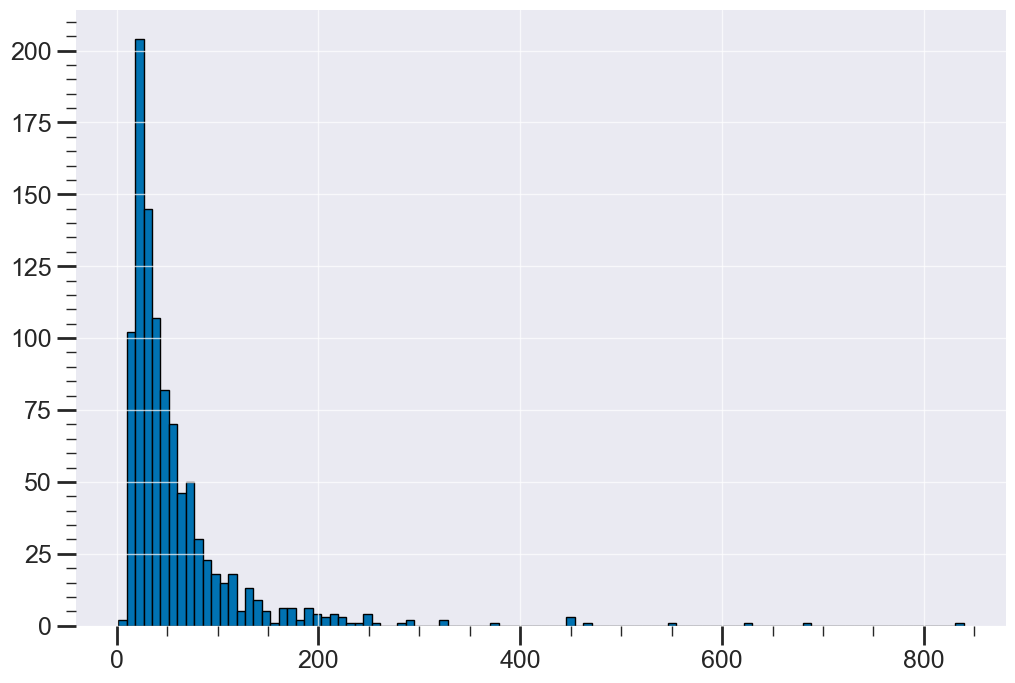